<a href="https://colab.research.google.com/github/Fida-nlp/Text-classification/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.4 MB/s eta 0:00:00


## Load Dataset

In [4]:
!pip install datasets
from datasets import load_dataset
dataset = load_dataset("ag_news")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 18.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [5]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})


In [6]:
train = dataset['train']
test = dataset['test']

In [7]:
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)

In [8]:
train_df.head()

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


In [9]:
test_df.head()

,text,label
0,Fears for T N pension after talks Unions repre...,2
1,The Race is On: Second Private Team Sets Launc...,3
2,Ky. Company Wins Grant to Study Peptides (AP) ...,3
3,Prediction Unit Helps Forecast Wildfires (AP) ...,3
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,3


In [10]:
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

## Check for missing values

In [11]:
# Check for missing values
print("\nMissing Values:")
print(train_df.isnull().sum())


Missing Values:
text     0
label    0
dtype: int64


## Basic information about the dataset

In [12]:
print("\nDataset Info:")
train_df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    120000 non-null  object
 1   label   120000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


## Basic statistics for numerical columns

In [13]:
print("\nNumerical Column Statistics:")
print(train_df.describe())


Numerical Column Statistics:
               label
count  120000.000000
mean        1.500000
std         1.118039
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000


## Unique classes and their distribution


Class Distribution:
label
2    30000
3    30000
1    30000
0    30000
Name: count, dtype: int64


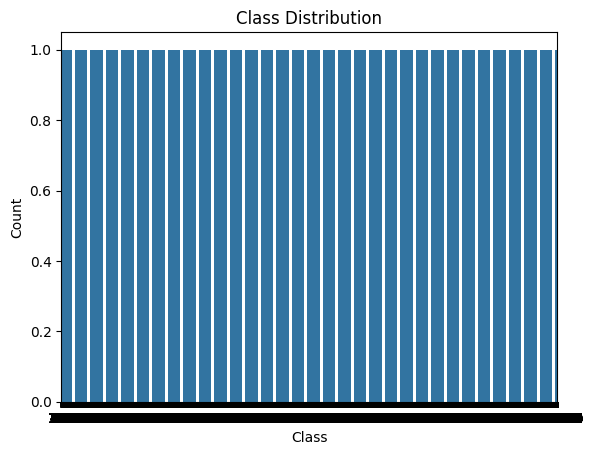

In [14]:
if 'label' in train_df.columns:
    print("\nClass Distribution:")
    print(train_df['label'].value_counts())
    sns.countplot(train_df['label'])
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()
else:
    print("The dataset does not have a 'label' column.")

## Analyze text length


Text Length Statistics:
count    120000.000000
mean        236.477525
std          66.509741
min         100.000000
25%         196.000000
50%         232.000000
75%         266.000000
max        1012.000000
Name: text_length, dtype: float64


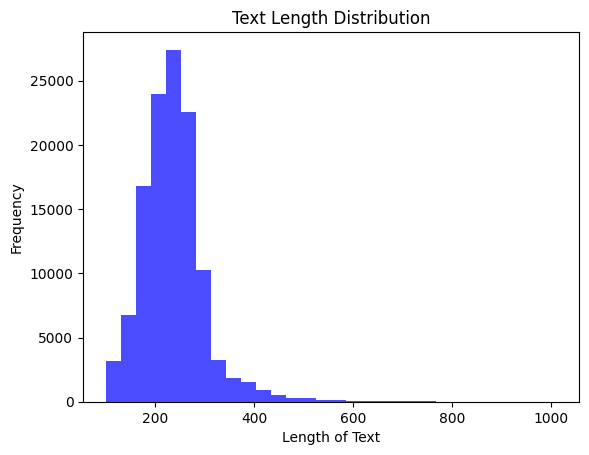


Most Common Words:
[('the', 177529), ('to', 117605), ('a', 98112), ('of', 97395), ('in', 92055), ('and', 68046), ('on', 55156), ('for', 48430), ('-', 39105), ('#39;s', 30928)]


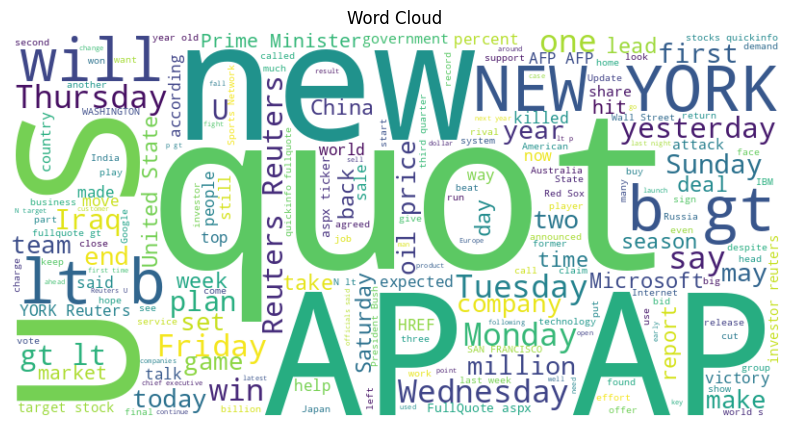

In [15]:
if 'text' in train_df.columns:
    train_df['text_length'] = train_df['text'].apply(len)
    print("\nText Length Statistics:")
    print(train_df['text_length'].describe())

    # Plot text length distribution
    plt.hist(train_df['text_length'], bins=30, color='blue', alpha=0.7)
    plt.title("Text Length Distribution")
    plt.xlabel("Length of Text")
    plt.ylabel("Frequency")
    plt.show()

    # Most common words
    print("\nMost Common Words:")
    all_words = ' '.join(train_df['text'])
    word_counts = Counter(all_words.split())
    most_common_words = word_counts.most_common(10)
    print(most_common_words)

    # Generate a WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud")
    plt.show()
else:
    print("The dataset does not have a 'text' column.")

## Correlation heatmap for numerical features (if any exist)

In [17]:
numerical_cols = test_df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numerical columns available for correlation analysis.")

No numerical columns available for correlation analysis.
